In [385]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
from xgboost import XGBClassifier


In [363]:
data = pd.read_csv('data-cancer.csv')
data.head()

,id,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [364]:
# Check for null values
data.isnull().sum()

id                         0
diagnosis                  0
Radius_mean                0
Texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

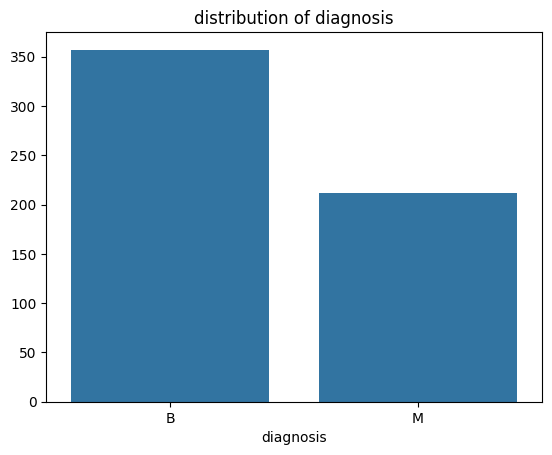

In [ ]:
# Visualizing the data
A=data['diagnosis'].groupby(data['diagnosis']).count()
sns.barplot(x=A.index,y=A.values)
plt.title("Distribution of diagnosis")
plt.show()

In [ ]:
# Cleaning the data
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})
del data['id']
data.head()

,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [368]:
X = data.loc[:,data.columns[1:]]
y = data['diagnosis']

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [ ]:
# Training the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=41)
dt.fit(X_train, y_train) 
y_pred = dt.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0])

In [381]:
# Evaluating the Decision Tree Classifier
y_pred = dt.predict(X_test) 
acc = accuracy_score(y_test, y_pred)
print(acc)
print(classification_report(y_test,y_pred))

0.9473684210526315
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        74
           1       0.90      0.95      0.93        40

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



The Decision Tree Classifier achieves an accuracy of 94.7% at predicting the malignance of cancer tumour.

In [380]:
# Cross validation over multiple depths
for depth in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]:
  dt = DecisionTreeClassifier(random_state=41, max_depth=depth) 
  dt.fit(X_train, y_train) 
  trainAccuracy = accuracy_score(y_train, dt.predict(X_train)) 
  valAccuracy = cross_val_score(dt, X_train, y_train, cv=10, n_jobs=-1)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.9164835164835164  Cross val score :  0.8856521739130436
Depth  :  2  Training Accuracy :  0.9494505494505494  Cross val score :  0.9163768115942028
Depth  :  3  Training Accuracy :  0.9692307692307692  Cross val score :  0.927342995169082
Depth  :  4  Training Accuracy :  0.9868131868131869  Cross val score :  0.92743961352657
Depth  :  5  Training Accuracy :  0.9912087912087912  Cross val score :  0.9252657004830919
Depth  :  6  Training Accuracy :  0.9978021978021978  Cross val score :  0.9186473429951691
Depth  :  7  Training Accuracy :  1.0  Cross val score :  0.9208212560386473
Depth  :  8  Training Accuracy :  1.0  Cross val score :  0.9164734299516908
Depth  :  9  Training Accuracy :  1.0  Cross val score :  0.9164734299516908
Depth  :  10  Training Accuracy :  1.0  Cross val score :  0.9164734299516908
Depth  :  11  Training Accuracy :  1.0  Cross val score :  0.9164734299516908
Depth  :  12  Training Accuracy :  1.0  Cross val score :  0.916

To minimize overfitting, a depth of 4 seems ideal as it has the highest cross validation score.

In [ ]:
# Training the XGBoost Classifier
xg = XGBClassifier(random_state=41)
xg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=41, ...)

0.9824561403508771
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        74
           1       0.95      1.00      0.98        40

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114



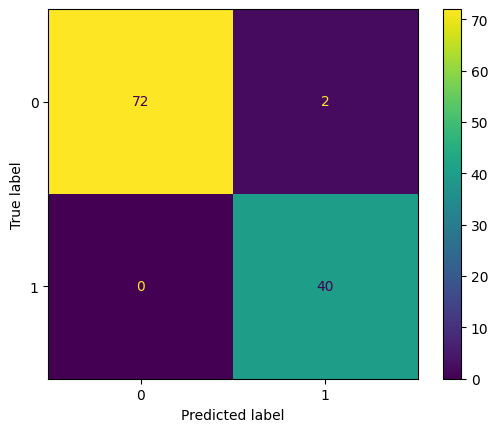

In [ ]:
# Evaluating the XGBoost Classifier
y_pred_xg = xg.predict(X_test)
print(accuracy_score(y_test,y_pred_xg))
print(classification_report(y_test,y_pred_xg))
ConfusionMatrixDisplay.from_estimator(xg,X_test,y_test)

The XGBoost Classifier gives a better accuracy of 98.2% and notably achieving 100% recall on malignant tumours. That means this model catches all malignant tumours with the given data with only minimal false positives.